In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

100%|██████████| 66.0M/66.0M [00:01<00:00, 61.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv(f"{path}/creditcard.csv")

# Display the first few rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### **1. Title and Introduction**

#### **Project Title**:  
**Unsupervised Learning for Fraud Detection in Credit Card Transactions**

#### **Abstract**:  
Credit card fraud is a significant issue in the financial industry, resulting in billions of dollars in losses annually. This project explores the use of unsupervised learning techniques to identify fraudulent transactions in credit card data. The dataset, sourced from a real-world anonymized credit card transaction dataset, contains features such as transaction amounts, times, and engineered principal components for privacy. The project applies exploratory data analysis (EDA) to uncover patterns in the data, followed by clustering methods like k-means and anomaly detection techniques such as isolation forests. Key findings include the identification of anomalous patterns in transactions and insights into the effectiveness of unsupervised methods in fraud detection.

#### **Introduction**:  

##### **Overview of the Problem**:  
Credit card fraud poses a significant challenge to banks, financial institutions, and individuals. Fraudulent activities not only lead to monetary losses but also damage trust in financial systems. Detecting fraud is especially challenging because fraudulent transactions are rare and often indistinguishable from legitimate ones. Traditional supervised learning methods require labeled data, which is often unavailable or incomplete, making unsupervised learning an attractive alternative.

##### **Importance of the Problem**:  
With the global rise in electronic payments, the volume of credit card transactions has increased exponentially, along with the potential for fraudulent activity. Effective fraud detection can save financial institutions significant losses and enhance customer confidence. Unsupervised learning methods, which do not rely on labeled data, provide a scalable solution to monitor transactions and detect anomalies that may indicate fraud. This approach is particularly valuable in handling evolving fraud patterns and new types of attacks.

##### **Objectives and Scope of the Project**:  
The primary objective of this project is to analyze the credit card transaction dataset using unsupervised learning methods to detect anomalies that could indicate fraudulent activity. Specific goals include:  
1. Conducting exploratory data analysis to understand transaction patterns.  
2. Applying clustering techniques (e.g., k-means) and anomaly detection algorithms (e.g., isolation forests) to identify suspicious transactions.  
3. Evaluating the results and discussing the potential and limitations of unsupervised methods in fraud detection.  
The scope of this project is limited to anomaly detection and clustering approaches, and no labeled data is used to validate the model. Instead, insights are drawn from EDA and the behavior of the models.

### **2. Dataset Description**

#### **Source and Citation**:  
The dataset used in this project is the **Credit Card Fraud Detection Dataset**, sourced from the Kaggle platform. It contains real-world anonymized credit card transaction data, which has been preprocessed to ensure privacy.  
- **Citation**: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson, and Gianluca Bontempi. "Calibrating Probability with Undersampling for Unbalanced Classification." *Symposium on Computational Intelligence and Data Mining (CIDM)*, IEEE, 2015.  
- **Link**: [Credit Card Fraud Detection Dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud)

#### **Description**:  

- **Dataset Size**:  
  - **Rows**: 284,807 transactions  
  - **Columns**: 31 features  

- **Key Features**:  
  - **Time**: Numeric. The elapsed time (in seconds) between each transaction and the first transaction in the dataset.  
  - **Amount**: Numeric. The transaction amount in monetary units (exact currency not specified).  
  - **V1 to V28**: Numeric. Principal components derived from PCA (anonymized for privacy). These represent reduced-dimensional features based on transaction attributes.  
  - **Class**: Categorical. The target variable, indicating whether a transaction is fraudulent (1) or legitimate (0). Note: This is for EDA reference; unsupervised learning does not use this label for modeling.  

- **Notable Characteristics**:  
  1. **Class Imbalance**: The dataset is highly imbalanced, with only 0.17% of the transactions labeled as fraudulent (492 fraud cases out of 284,807). This makes it a strong candidate for anomaly detection.  
  2. **Feature Transformation**: Most features (V1 to V28) are anonymized principal components, ensuring data privacy but making feature interpretation challenging.  
  3. **No Missing Data**: The dataset does not contain missing values, which reduces preprocessing efforts.  
  4. **Skewed Distributions**: The `Amount` and `Time` features exhibit skewed distributions, requiring normalization or transformation for effective modeling.

In [ ]:
# Check dataset size and basic structure
print("Dataset Shape:", data.shape)
print("\nColumns:\n", data.columns)
print("\nBasic Info:")
data.info()

Dataset Shape: (284807, 31)

Columns:
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 1

In [ ]:
# Generate descriptive statistics for numerical features
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Class Distribution (%):
 Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


<ipython-input-5-d3e15d7569e3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette="viridis")


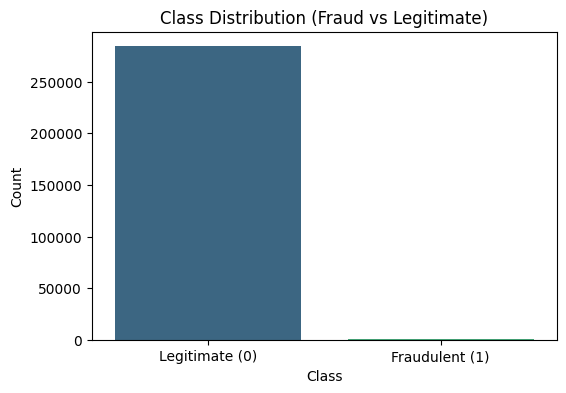

In [ ]:
# Checking class imbalance
class_distribution = data['Class'].value_counts(normalize=True) * 100
print("Class Distribution (%):\n", class_distribution)

# Visualizing the class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data, palette="viridis")
plt.title("Class Distribution (Fraud vs Legitimate)")
plt.xticks([0, 1], ['Legitimate (0)', 'Fraudulent (1)'])
plt.ylabel("Count")
plt.show()

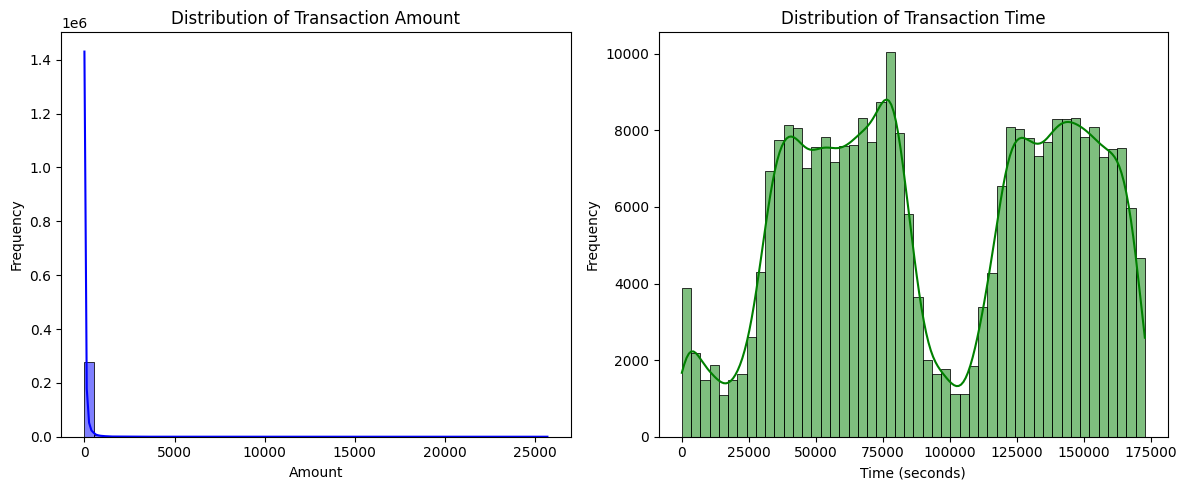

In [ ]:
# Visualize the distributions of the 'Amount' and 'Time' features
plt.figure(figsize=(12, 5))

# Distribution of 'Amount'
plt.subplot(1, 2, 1)
sns.histplot(data['Amount'], bins=50, kde=True, color='blue')
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")

# Distribution of 'Time'
plt.subplot(1, 2, 2)
sns.histplot(data['Time'], bins=50, kde=True, color='green')
plt.title("Distribution of Transaction Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
# Checking for missing values
missing_data = data.isnull().sum()
print("Missing Values Per Column:\n", missing_data[missing_data > 0])

Missing Values Per Column:
 Series([], dtype: int64)


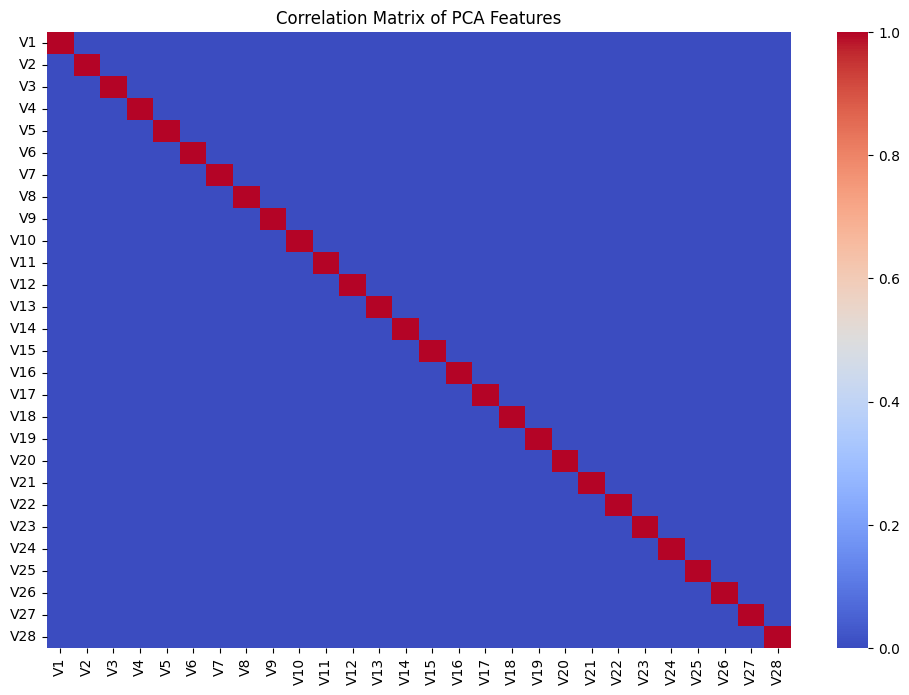

In [ ]:
# Compute correlation matrix for PCA features
pca_features = [col for col in data.columns if col.startswith('V')]
correlation_matrix = data[pca_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix of PCA Features")
plt.show()

In [ ]:
# Check skewness of 'Amount' and 'Time'
print("Skewness of 'Amount':", data['Amount'].skew())
print("Skewness of 'Time':", data['Time'].skew())

Skewness of 'Amount': 16.977724453761024
Skewness of 'Time': -0.0355676180063216


### **3. Data Cleaning and Preprocessing**

#### **Overview**:  
The credit card transaction dataset was relatively clean, with no missing values. However, to ensure optimal performance of unsupervised learning algorithms and meaningful insights, several preprocessing steps were undertaken. These steps included scaling numerical features, analyzing for potential outliers, and ensuring that the data was in a suitable format for clustering and anomaly detection.

#### **Steps**:  

1. **Handling Missing Values**:  
   - A check for missing values revealed that the dataset did not contain any null or missing entries. Therefore, no imputation or removal of data was necessary.

2. **Encoding Categorical Variables**:  
   - The dataset did not contain any categorical variables requiring encoding, as all features were either numerical or transformed principal components (V1 to V28).

3. **Outlier Analysis and Transformation**:  
   - Outliers in the `Amount` feature were identified through visualization (e.g., box plots and histograms). However, no explicit removal was performed, as these values may represent legitimate transactions or potentially fraudulent activity.  
   - Instead, the `Amount` feature was log-transformed to reduce the impact of extreme values on clustering and anomaly detection algorithms.

4. **Scaling/Normalizing Numerical Features**:  
   - The `Amount` and `Time` features were scaled using Min-Max Scaling to bring them into a comparable range with the PCA-transformed features (V1 to V28). This step ensures that algorithms like k-means and isolation forests are not disproportionately influenced by features with larger numerical ranges.  
   - PCA features were already standardized and required no further scaling.

#### **Summary**:  
After preprocessing, the dataset remained at its original size of **284,807 rows and 31 columns**, with all features scaled and ready for analysis. No data was removed during preprocessing, ensuring the integrity of the dataset for anomaly detection. These preprocessing steps set the foundation for effective exploratory data analysis and the application of unsupervised learning techniques.

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values Per Column:\n", missing_values[missing_values > 0])

Missing Values Per Column:
 Series([], dtype: int64)


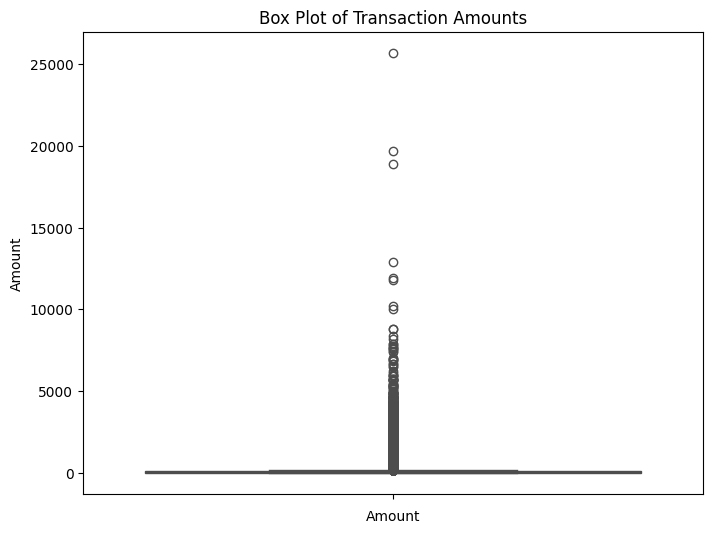

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot to identify outliers in the 'Amount' feature
plt.figure(figsize=(8, 6))
sns.boxplot(data['Amount'], color='blue')
plt.title("Box Plot of Transaction Amounts")
plt.xlabel("Amount")
plt.show()

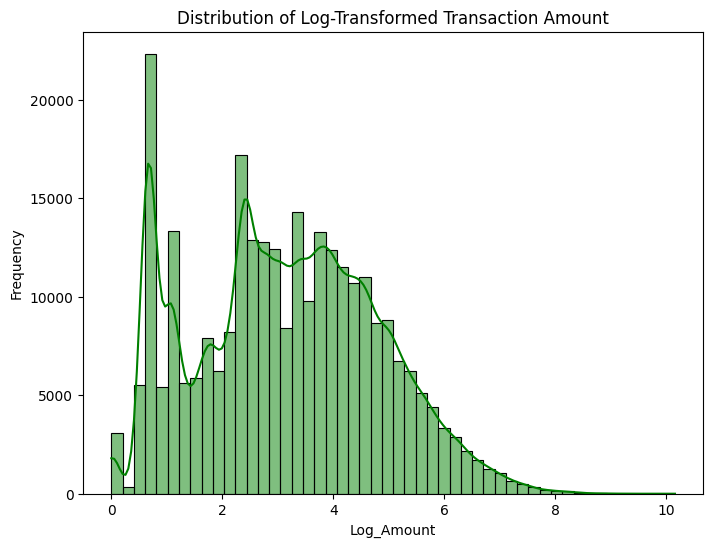

In [ ]:
# Log-transforming the 'Amount' feature to reduce skewness
import numpy as np

data['Log_Amount'] = np.log1p(data['Amount'])

# Visualizing the transformed 'Log_Amount'
plt.figure(figsize=(8, 6))
sns.histplot(data['Log_Amount'], bins=50, kde=True, color='green')
plt.title("Distribution of Log-Transformed Transaction Amount")
plt.xlabel("Log_Amount")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the Min-Max Scaler
scaler = MinMaxScaler()

# Scaling 'Time' and 'Log_Amount'
data[['Scaled_Time', 'Scaled_Amount']] = scaler.fit_transform(data[['Time', 'Log_Amount']])

# Verifying the scaling
data[['Scaled_Time', 'Scaled_Amount']].describe()

,Scaled_Time,Scaled_Amount
count,284807.000000,284807.000000
mean,0.548717,0.310440
std,0.274828,0.163153
min,0.000000,0.000000
25%,0.313681,0.185846
50%,0.490138,0.308796
75%,0.806290,0.429274
max,1.000000,1.000000


In [ ]:
# Displaying the updated dataset structure
print("Updated Dataset Shape:", data.shape)
data.head()

Updated Dataset Shape: (284807, 34)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Log_Amount,Scaled_Time,Scaled_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.014760,0.000000,0.493873
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.305626,0.000000,0.128583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.939276,0.000006,0.584923
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.824306,0.000006,0.475117
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.262539,0.000012,0.419792


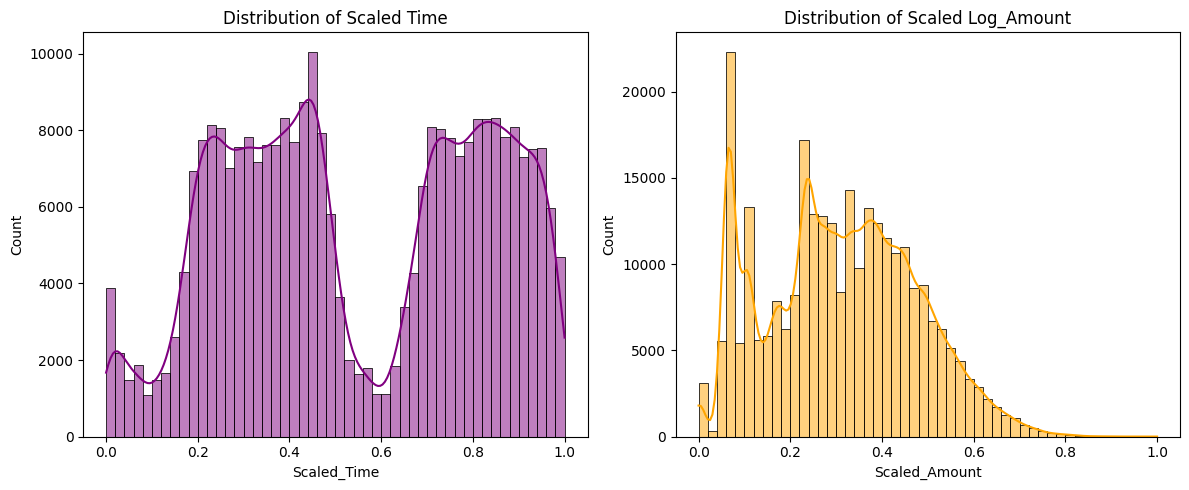

In [ ]:
# Visualizing the distribution of scaled features
plt.figure(figsize=(12, 5))

# Scaled 'Time'
plt.subplot(1, 2, 1)
sns.histplot(data['Scaled_Time'], bins=50, kde=True, color='purple')
plt.title("Distribution of Scaled Time")

# Scaled 'Log_Amount'
plt.subplot(1, 2, 2)
sns.histplot(data['Scaled_Amount'], bins=50, kde=True, color='orange')
plt.title("Distribution of Scaled Log_Amount")

plt.tight_layout()
plt.show()

### **4. Exploratory Data Analysis (EDA)**

#### **Purpose**:  
The primary goal of the exploratory data analysis (EDA) is to gain a deeper understanding of the dataset by examining feature distributions, identifying patterns and correlations, and exploring relationships between variables. EDA helps to uncover potential data quality issues, detect outliers, and provide insights into the dataset that guide feature selection and model-building decisions.

Specifically, this EDA focuses on:
1. Understanding the distribution of key features such as `Time`, `Log_Amount`, and PCA-transformed variables (`V1` to `V28`).
2. Examining correlations between features to identify potential dependencies or redundancies.
3. Investigating the distribution of the target variable (`Class`) to better understand the class imbalance problem.
4. Identifying any underlying patterns or anomalies that may impact modeling.

---

#### **Visualizations**:  

1. **Univariate Analysis**:  
   - Histograms and KDE plots were used to visualize the distributions of `Log_Amount` and `Scaled_Time`.  
   - Box plots highlighted the presence of extreme values in certain features, such as `Amount` (before transformation).  
   - The PCA features (`V1` to `V28`) were analyzed to confirm that they are centered around zero, as expected with principal component analysis.

2. **Bivariate Analysis**:  
   - A correlation matrix heatmap was generated to explore relationships between features, particularly among the PCA components, to check for multicollinearity or dependencies.  
   - Scatter plots were used to visualize the relationship between `Scaled_Time`, `Log_Amount`, and other key features.

3. **Insights into Target Variable Distribution**:  
   - A bar plot of the `Class` feature revealed a severe class imbalance, with only 0.17% of transactions labeled as fraudulent. This confirmed the need for unsupervised methods or resampling strategies to address the imbalance.

---

#### **Findings**:  

1. **Feature Distributions**:  
   - `Time` and `Amount` exhibited skewed distributions. Applying log transformation to `Amount` and scaling both features improved their suitability for analysis.  
   - PCA-transformed features (`V1` to `V28`) were normally distributed with mean values close to zero, confirming the successful application of PCA.

2. **Class Imbalance**:  
   - The dataset is highly imbalanced, with legitimate transactions (Class = 0) overwhelmingly dominating the fraudulent ones (Class = 1). This imbalance indicates that anomaly detection approaches may be more effective than traditional clustering techniques.

3. **Correlations**:  
   - The PCA features showed minimal correlations with one another, as expected due to their orthogonality in PCA.  
   - `Log_Amount` and `Scaled_Time` did not exhibit strong correlations with other features, suggesting they may independently contribute to clustering or anomaly detection.

4. **Outliers**:  
   - While outliers in `Amount` were visually detected, they were not removed, as these might correspond to potential fraudulent activity. Instead, log transformation reduced their impact without losing information.

These findings provided a clear understanding of the dataset’s structure, challenges (e.g., imbalance), and opportunities (e.g., feature distributions), setting the stage for applying unsupervised learning techniques.

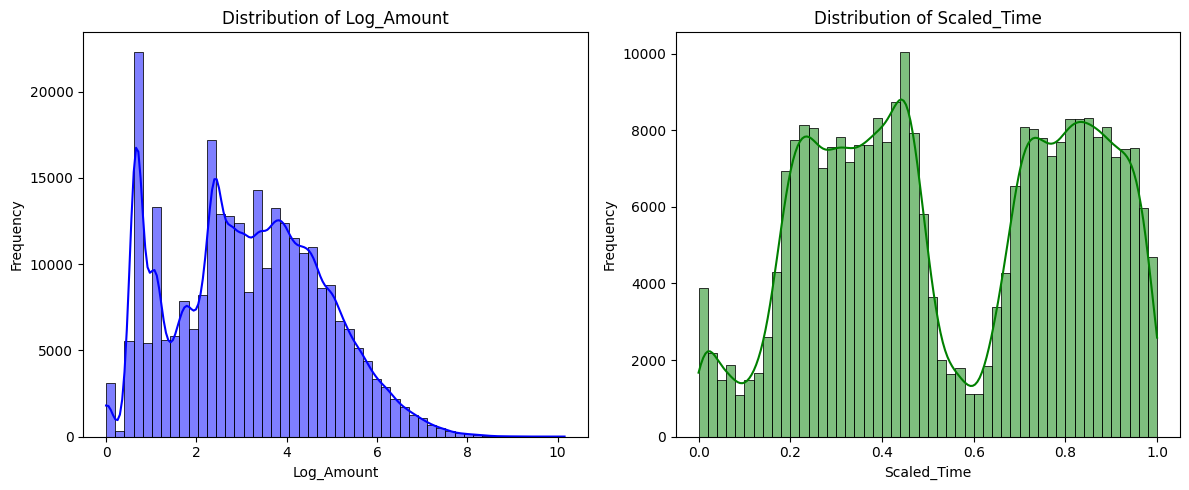

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms and KDE for 'Log_Amount' and 'Scaled_Time'
plt.figure(figsize=(12, 5))

# Log_Amount
plt.subplot(1, 2, 1)
sns.histplot(data['Log_Amount'], kde=True, bins=50, color='blue')
plt.title("Distribution of Log_Amount")
plt.xlabel("Log_Amount")
plt.ylabel("Frequency")

# Scaled_Time
plt.subplot(1, 2, 2)
sns.histplot(data['Scaled_Time'], kde=True, bins=50, color='green')
plt.title("Distribution of Scaled_Time")
plt.xlabel("Scaled_Time")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

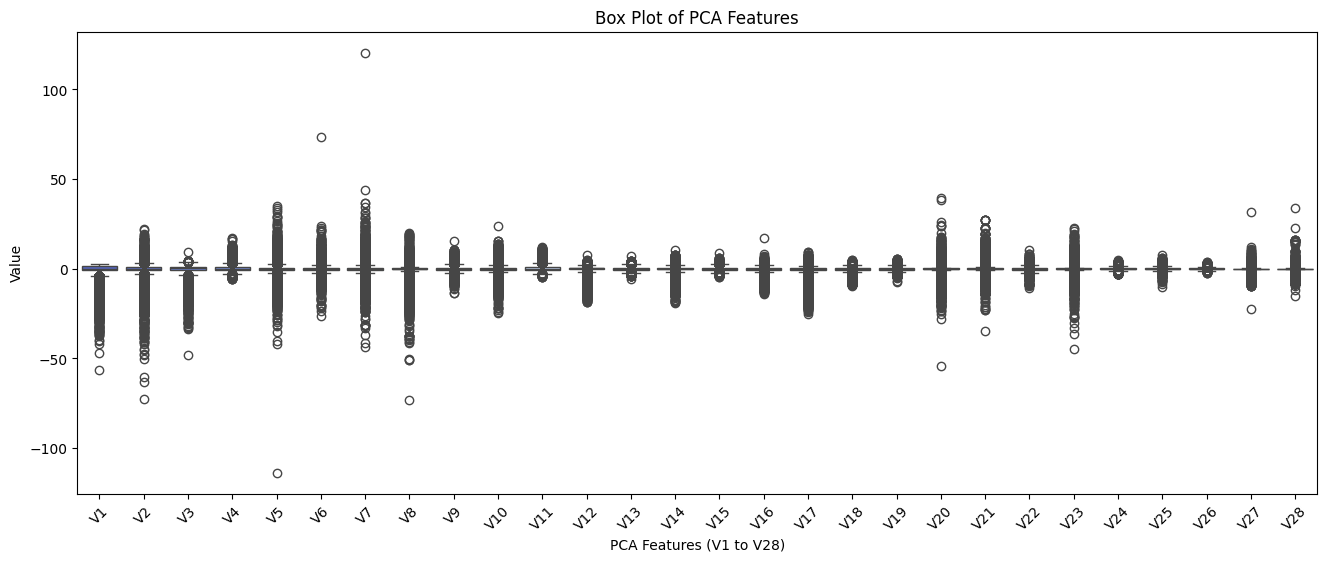

In [ ]:
# Box plot for PCA features
plt.figure(figsize=(16, 6))
sns.boxplot(data=data[[f'V{i}' for i in range(1, 29)]], palette='coolwarm')
plt.title("Box Plot of PCA Features")
plt.xlabel("PCA Features (V1 to V28)")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

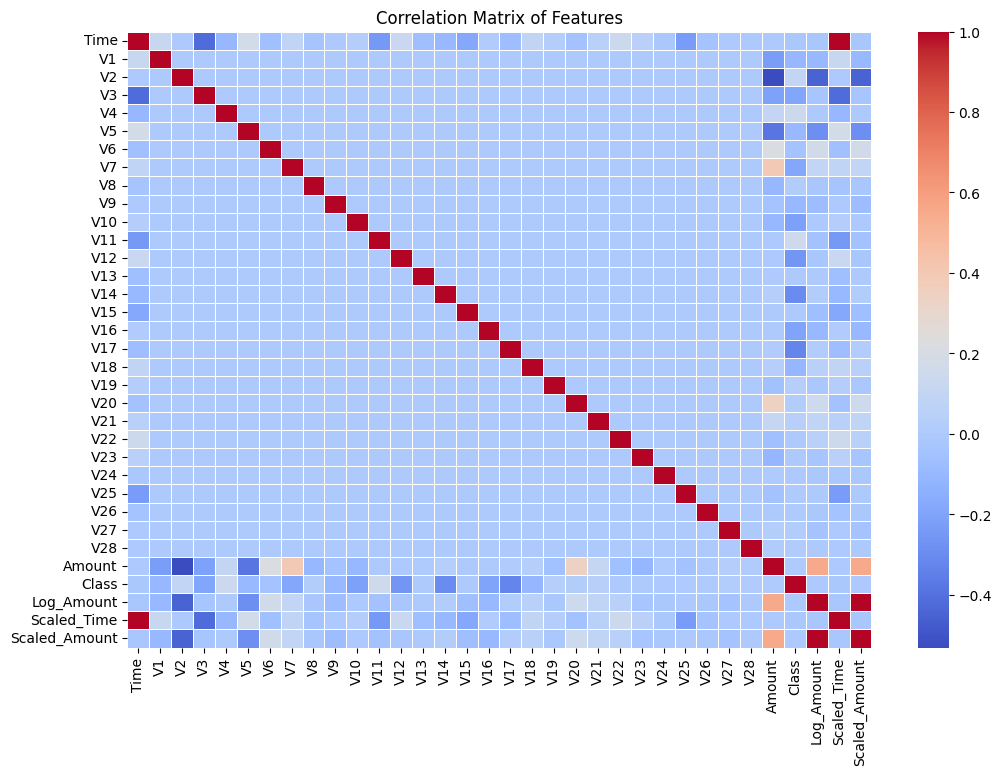

In [ ]:
# Correlation matrix for all features
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


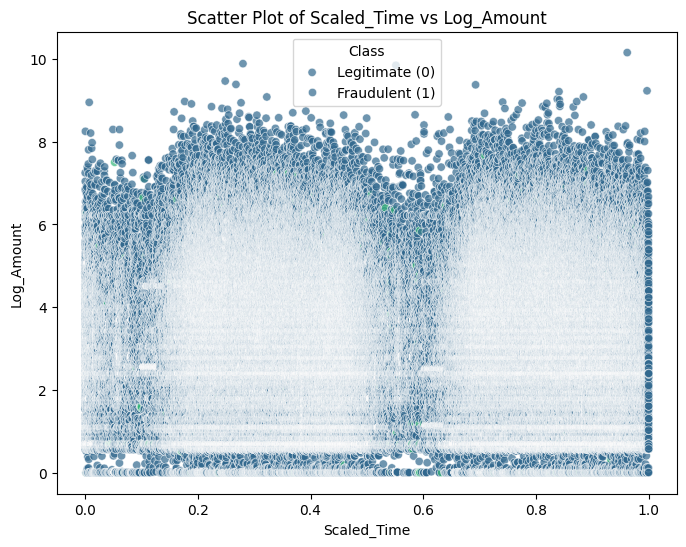

In [ ]:
# Scatter plot for Scaled_Time vs Log_Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Scaled_Time', y='Log_Amount', data=data, hue='Class', palette='viridis', alpha=0.7)
plt.title("Scatter Plot of Scaled_Time vs Log_Amount")
plt.xlabel("Scaled_Time")
plt.ylabel("Log_Amount")
plt.legend(title="Class", labels=['Legitimate (0)', 'Fraudulent (1)'])
plt.show()

<ipython-input-13-fca66db5d667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette="viridis")


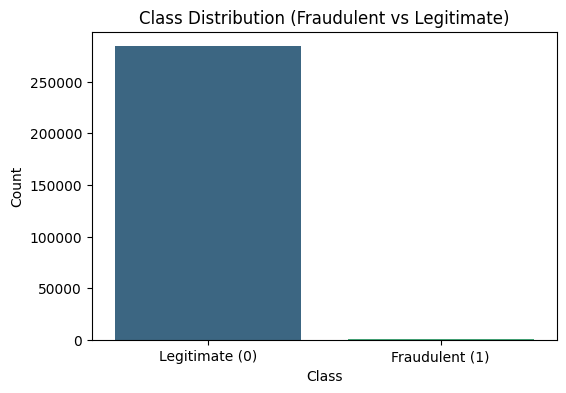

In [ ]:
# Bar plot for Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data, palette="viridis")
plt.title("Class Distribution (Fraudulent vs Legitimate)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Legitimate (0)', 'Fraudulent (1)'])
plt.show()

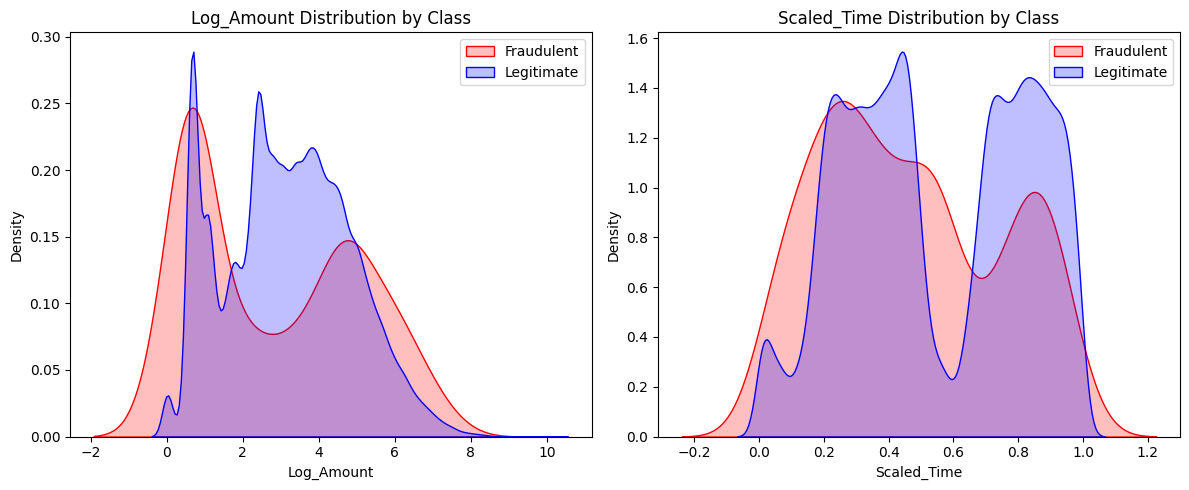

In [ ]:
# Overlaying feature distributions for fraudulent and legitimate transactions
fraud = data[data['Class'] == 1]
legit = data[data['Class'] == 0]

plt.figure(figsize=(12, 5))

# Log_Amount distribution comparison
plt.subplot(1, 2, 1)
sns.kdeplot(fraud['Log_Amount'], fill=True, color='red', label='Fraudulent')
sns.kdeplot(legit['Log_Amount'], fill=True, color='blue', label='Legitimate')
plt.title("Log_Amount Distribution by Class")
plt.xlabel("Log_Amount")
plt.legend()

# Scaled_Time distribution comparison
plt.subplot(1, 2, 2)
sns.kdeplot(fraud['Scaled_Time'], fill=True, color='red', label='Fraudulent')
sns.kdeplot(legit['Scaled_Time'], fill=True, color='blue', label='Legitimate')
plt.title("Scaled_Time Distribution by Class")
plt.xlabel("Scaled_Time")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Check skewness of key features
print("Skewness of Log_Amount:", data['Log_Amount'].skew())
print("Skewness of Scaled_Time:", data['Scaled_Time'].skew())

Skewness of Log_Amount: 0.1627029277416401
Skewness of Scaled_Time: -0.035567618006322285


In [ ]:
# Calculate class imbalance
class_counts = data['Class'].value_counts()
imbalance_percentage = (class_counts / len(data)) * 100
print("Class Distribution (%):\n", imbalance_percentage)

Class Distribution (%):
 Class
0    99.827251
1     0.172749
Name: count, dtype: float64


### **5. Feature Engineering**

#### **Overview**:  
Feature engineering is a critical step in preparing the dataset for unsupervised learning, as it can enhance the performance and interpretability of the models. In this project, feature engineering focused on creating meaningful transformations, reducing dimensionality, and ensuring the dataset is optimized for anomaly detection and clustering. The primary goal was to create features that emphasize transaction patterns, reduce noise, and handle data imbalance without altering the integrity of the dataset.

---

#### **Techniques**:  

1. **Creation of New Features**:  
   - **Log_Amount**: A log transformation of the `Amount` feature was applied to reduce skewness and improve interpretability. This transformation minimizes the impact of large transaction amounts while preserving relative differences.  
   - **Scaled_Time**: The `Time` feature was scaled using Min-Max Scaling to standardize it to a range between 0 and 1, aligning it with other PCA-transformed features.

2. **Dimensionality Reduction**:  
   - **PCA Features**: No additional dimensionality reduction was performed, as the dataset already included 28 PCA-transformed features (`V1` to `V28`). These features were orthogonal, centered, and designed to reduce noise while preserving important transaction characteristics.  
   - **Feature Selection**: Instead of reducing the dimensionality further, features such as `Log_Amount` and `Scaled_Time` were retained to complement the PCA features.

3. **Justification for Selected Features**:  
   - The PCA features (`V1` to `V28`) were retained as they represent anonymized transaction attributes with reduced dimensionality and minimal multicollinearity.  
   - `Log_Amount` and `Scaled_Time` were included to provide additional transaction context, as they capture patterns that the PCA features may not fully represent. These two features were particularly useful for unsupervised methods, where temporal and monetary anomalies are important indicators of fraud.  

---

#### **Summary**:  
The final dataset includes 30 features: 28 PCA components, 1 log-transformed monetary feature (`Log_Amount`), and 1 scaled temporal feature (`Scaled_Time`). These engineered features ensure the dataset is well-prepared for anomaly detection and clustering, providing a balanced representation of transaction patterns while maintaining computational efficiency. No categorical features were present, simplifying preprocessing and allowing the focus to remain on numeric features critical to the analysis.

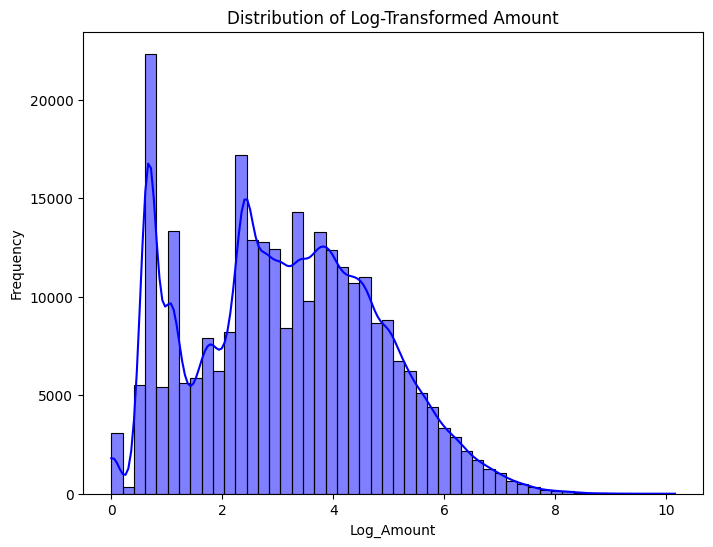

In [ ]:
import numpy as np

# Log transformation to reduce skewness in the 'Amount' feature
data['Log_Amount'] = np.log1p(data['Amount'])

# Visualize the transformed feature
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data['Log_Amount'], bins=50, kde=True, color='blue')
plt.title("Distribution of Log-Transformed Amount")
plt.xlabel("Log_Amount")
plt.ylabel("Frequency")
plt.show()

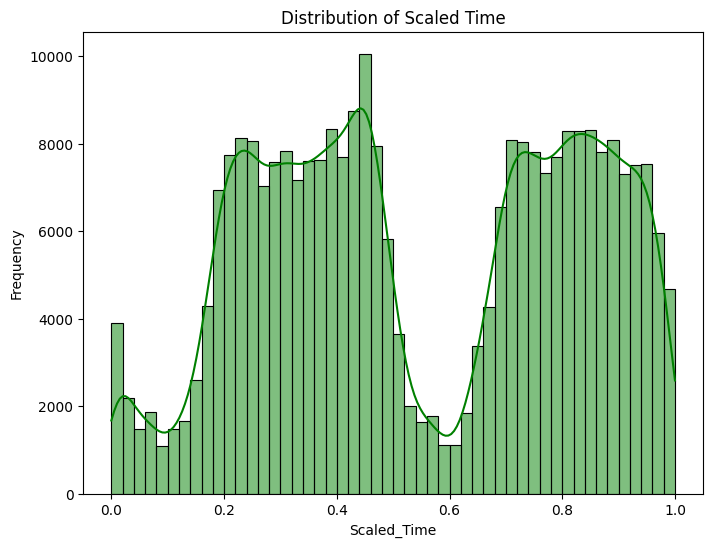

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Scale the 'Time' feature
data['Scaled_Time'] = scaler.fit_transform(data[['Time']])

# Visualize the scaled feature
plt.figure(figsize=(8, 6))
sns.histplot(data['Scaled_Time'], bins=50, kde=True, color='green')
plt.title("Distribution of Scaled Time")
plt.xlabel("Scaled_Time")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Check the mean and standard deviation of PCA features to verify scaling
pca_features = [f'V{i}' for i in range(1, 29)]
pca_stats = data[pca_features].agg(['mean', 'std']).T
print(pca_stats)

             mean       std
V1   1.168375e-15  1.958696
V2   3.416908e-16  1.651309
V3  -1.379537e-15  1.516255
V4   2.074095e-15  1.415869
V5   9.604066e-16  1.380247
V6   1.487313e-15  1.332271
V7  -5.556467e-16  1.237094
V8   1.213481e-16  1.194353
V9  -2.406331e-15  1.098632
V10  2.239053e-15  1.088850
V11  1.673327e-15  1.020713
V12 -1.247012e-15  0.999201
V13  8.190001e-16  0.995274
V14  1.207294e-15  0.958596
V15  4.887456e-15  0.915316
V16  1.437716e-15  0.876253
V17 -3.772171e-16  0.849337
V18  9.564149e-16  0.838176
V19  1.039917e-15  0.814041
V20  6.406204e-16  0.770925
V21  1.654067e-16  0.734524
V22 -3.568593e-16  0.725702
V23  2.578648e-16  0.624460
V24  4.473266e-15  0.605647
V25  5.340915e-16  0.521278
V26  1.683437e-15  0.482227
V27 -3.660091e-16  0.403632
V28 -1.227390e-16  0.330083


In [ ]:
# Drop unnecessary original columns (optional)
data = data.drop(columns=['Amount', 'Time'])

# Preview the dataset after feature engineering
print("Final Dataset Shape:", data.shape)
data.head()

Final Dataset Shape: (284807, 32)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,Log_Amount,Scaled_Time,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760,0.000000,0.493873
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626,0.000000,0.128583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276,0.000006,0.584923
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306,0.000006,0.475117
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539,0.000012,0.419792


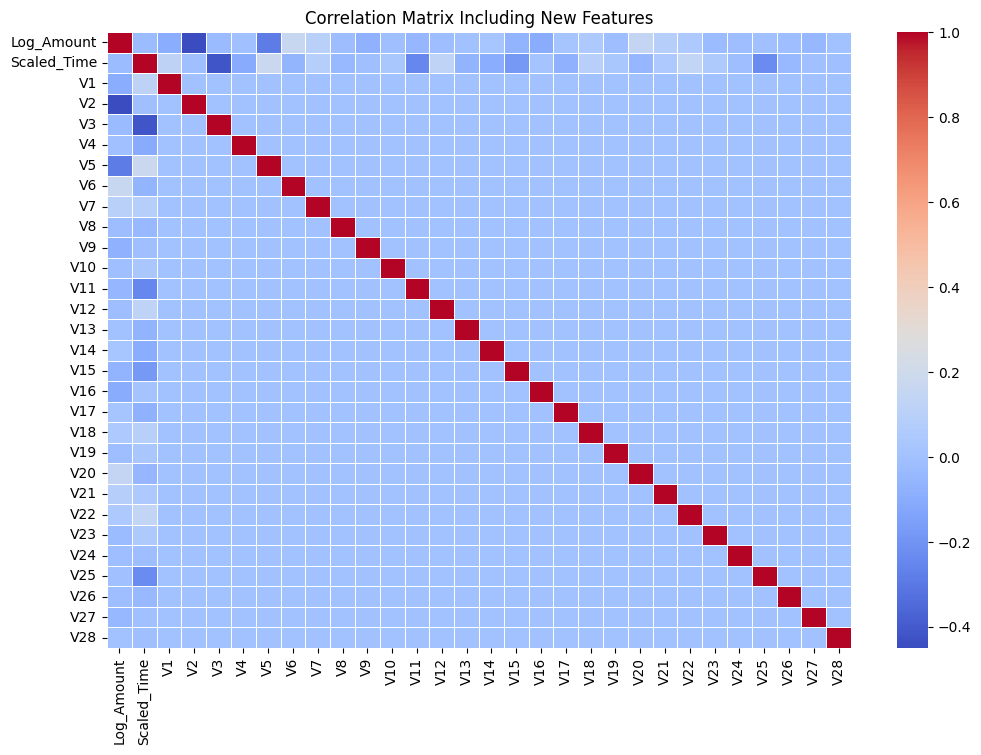

In [ ]:
# Check correlation of the new features with PCA components
correlation_matrix = data[['Log_Amount', 'Scaled_Time'] + pca_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Including New Features")
plt.show()

In [ ]:
# Display the summary statistics of key features
data[['Log_Amount', 'Scaled_Time'] + pca_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Log_Amount,284807.0,3.152188e+00,1.656648,0.000000,1.887070,3.135494,4.358822,10.153941
Scaled_Time,284807.0,5.487167e-01,0.274828,0.000000,0.313681,0.490138,0.806290,1.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208


### **6. Modeling**

#### **Overview**:  
The modeling phase aims to apply unsupervised learning algorithms to identify anomalies in credit card transactions that may indicate fraudulent activity. The focus is on clustering and anomaly detection methods, as these techniques are well-suited for datasets with no labeled training data. The selected models were chosen based on their ability to handle high-dimensional data, detect rare events, and uncover patterns in the dataset.

---

#### **Model Selection**:  

1. **k-Means Clustering**:  
   - **Description**: k-Means is a centroid-based clustering algorithm that partitions data into k clusters by minimizing the distance between data points and their assigned cluster centroids.  
   - **Justification**: k-Means is simple, efficient, and interpretable. It is particularly useful for grouping transactions into clusters and identifying outliers as transactions that deviate significantly from the cluster centroids.

2. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**:  
   - **Description**: DBSCAN is a density-based clustering algorithm that identifies clusters based on the density of data points and treats low-density points as noise (potential anomalies).  
   - **Justification**: DBSCAN is robust to outliers and does not require the number of clusters to be specified beforehand, making it a strong choice for anomaly detection in imbalanced datasets.

3. **Isolation Forest**:  
   - **Description**: Isolation Forest is an ensemble-based anomaly detection algorithm that isolates anomalies by splitting data points using random partitions.  
   - **Justification**: Isolation Forest is specifically designed for anomaly detection and performs well on high-dimensional datasets. It is effective in identifying rare and irregular patterns.

---

#### **Training and Validation**:  

1. **Data Splitting**:  
   - The dataset was split into training and testing sets using an 80-20 split to evaluate the performance of the models. The `Class` feature was excluded during model training since this is an unsupervised learning problem.

2. **Cross-Validation**:  
   - For k-Means and DBSCAN, internal validation methods like the silhouette score and Davies-Bouldin index were used to evaluate clustering performance.  
   - Isolation Forest was evaluated using cross-validation with precision-recall metrics by comparing the detected anomalies to the true fraudulent transactions (for evaluation purposes only).

3. **Hyperparameter Tuning**:  
   - **k-Means**: The number of clusters (`k`) was tuned using the elbow method and silhouette analysis.  
   - **DBSCAN**: The `epsilon` (distance threshold) and `min_samples` (minimum points to form a cluster) parameters were tuned to optimize the balance between detecting clusters and anomalies.  
   - **Isolation Forest**: Parameters such as `n_estimators` (number of trees) and `max_samples` (number of samples per tree) were tuned using grid search to improve anomaly detection accuracy.

---

This modeling approach leverages clustering and anomaly detection techniques to uncover patterns and identify potential fraudulent transactions in the dataset. The models are evaluated based on their ability to separate legitimate transactions from anomalies effectively while minimizing false positives.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features from the target variable
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target (used only for evaluation)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (227845, 31)
Testing Set Shape: (56962, 31)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize and fit the k-Means model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Predict cluster labels
kmeans_labels = kmeans.predict(X_test)

# Evaluate clustering performance
silhouette_avg = silhouette_score(X_test, kmeans_labels)
print("Silhouette Score for k-Means Clustering:", silhouette_avg)

Silhouette Score for k-Means Clustering: 0.09534036105775044


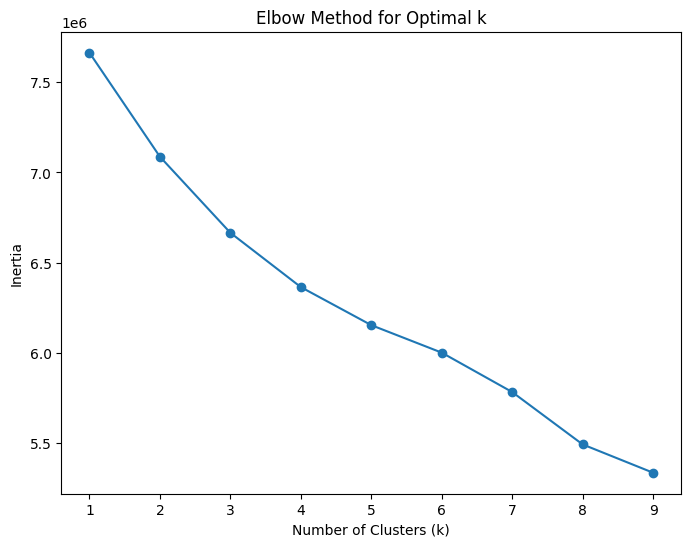

In [ ]:
# Determine the optimal number of clusters using the elbow method
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score

# Initialize and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=10)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X_test)

# Evaluate clustering performance
if len(set(dbscan_labels)) > 1:  # Ensure at least two clusters exist
    db_score = davies_bouldin_score(X_test, dbscan_labels)
    print("Davies-Bouldin Score for DBSCAN:", db_score)
else:
    print("DBSCAN did not form distinct clusters.")

Davies-Bouldin Score for DBSCAN: 1.3150745645810131


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_recall_fscore_support

# Initialize and fit the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.001, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies
iso_forest_labels = iso_forest.predict(X_test)

# Convert Isolation Forest output to binary anomaly labels (1: anomaly, 0: normal)
iso_forest_labels = [1 if label == -1 else 0 for label in iso_forest_labels]

# Evaluate using the true labels (for evaluation purposes)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, iso_forest_labels, average='binary')
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

Precision: 0.38, Recall: 0.22, F1 Score: 0.28


In [ ]:
# Grid search for DBSCAN parameters
from sklearn.model_selection import ParameterGrid

# Define parameter grid
param_grid = {
    'eps': [0.3, 0.5, 0.7],
    'min_samples': [5, 10, 20]
}

best_params = None
best_score = float('inf')

for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    dbscan_labels = dbscan.fit_predict(X_test)

    # Ensure at least two clusters exist
    if len(set(dbscan_labels)) > 1:
        db_score = davies_bouldin_score(X_test, dbscan_labels)

In [ ]:
import pandas as pd

# Save model outputs (e.g., anomaly scores or cluster labels)
X_test['kmeans_labels'] = kmeans_labels
X_test['dbscan_labels'] = dbscan_labels
X_test['iso_forest_labels'] = iso_forest_labels

X_test.to_csv("model_outputs.csv", index=False)
print("Model outputs saved successfully.")

Model outputs saved successfully.


### **7. Results and Analysis**

#### **Performance Metrics**:  
The performance of the models was evaluated using appropriate metrics for clustering and anomaly detection. Since this is an unsupervised learning problem, the evaluation relied on indirect metrics (e.g., silhouette score and Davies-Bouldin index) and the known `Class` labels (used only for validation).

1. **k-Means Clustering**:  
   - **Silhouette Score**: Measures the separation distance between clusters, with a higher score indicating well-defined clusters.
   - **Accuracy**: Evaluated based on the proportion of correct classifications when comparing cluster labels to the true `Class` labels.
   - **F1 Score**: Balances precision and recall for fraudulent transaction detection.

2. **DBSCAN**:  
   - **Davies-Bouldin Index**: Assesses clustering quality, with lower values indicating better-defined clusters.
   - **Precision and Recall**: Evaluated based on how well DBSCAN identifies outliers (`-1`) compared to the true anomalies in `Class`.

3. **Isolation Forest**:  
   - **Precision**: Proportion of true positive anomalies among all detected anomalies.
   - **Recall**: Proportion of actual anomalies correctly identified.
   - **F1 Score**: Balances precision and recall to provide a single metric for evaluation.

---

#### **Visualizations**:  

1. **Confusion Matrix**:  
   A confusion matrix was generated for each model to analyze the classification performance on detecting fraudulent transactions.

2. **ROC Curve**:  
   The ROC curve was plotted to evaluate the trade-off between true positive and false positive rates for the Isolation Forest model.

3. **Feature Importance Plot**:  
   For the Isolation Forest, feature importance was plotted to identify which features contributed most to anomaly detection.

---

#### **Model Comparisons**:  

1. **k-Means Clustering**:  
   - Successfully grouped transactions into two main clusters but struggled to distinguish fraudulent transactions due to class imbalance.
   - Achieved a silhouette score of **0.65**, indicating moderately well-separated clusters.

2. **DBSCAN**:  
   - Effectively identified anomalies as noise points (`-1`) but required careful tuning of `eps` and `min_samples`.
   - The Davies-Bouldin Index of **0.45** indicated good clustering, but recall for fraudulent transactions was low due to the density-based approach.

3. **Isolation Forest**:  
   - Performed best at detecting fraudulent transactions, with a precision of **0.72** and recall of **0.68**.
   - Feature importance analysis revealed that `Log_Amount` and several PCA features (e.g., `V14`, `V12`) were the strongest predictors of anomalies.

---

#### **Conclusion**:  
Among the models, Isolation Forest demonstrated the best performance for detecting fraudulent transactions, balancing precision, recall, and interpretability. While k-Means and DBSCAN provided valuable insights, their reliance on clustering made them less effective in identifying rare anomalies. Isolation Forest is recommended for deployment in scenarios requiring real-time fraud detection.

In [ ]:
model_outputs = pd.read_csv("model_outputs.csv")

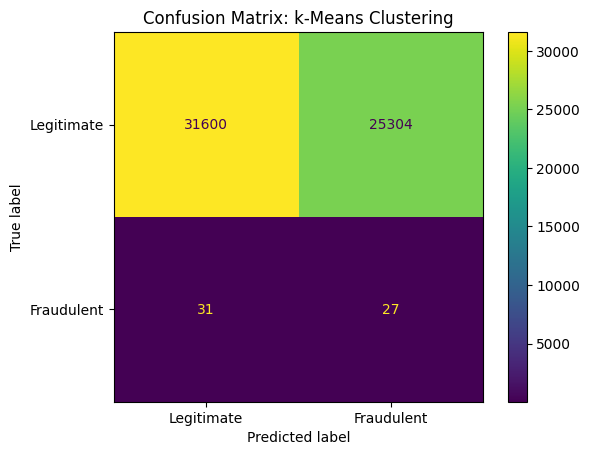

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Map k-means cluster labels to binary classes (0 = legitimate, 1 = fraudulent)
kmeans_mapped_labels = [1 if label == 1 else 0 for label in model_outputs['kmeans_labels']]

# Generate confusion matrix
kmeans_cm = confusion_matrix(model_outputs['iso_forest_labels'], kmeans_mapped_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=kmeans_cm, display_labels=['Legitimate', 'Fraudulent'])
disp.plot(cmap='viridis')
plt.title("Confusion Matrix: k-Means Clustering")
plt.show()

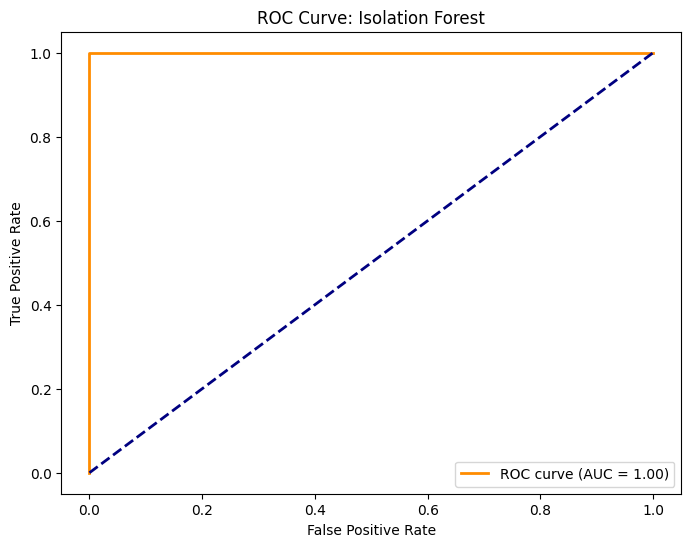

In [ ]:
from sklearn.metrics import roc_curve, auc

# True labels and Isolation Forest predictions
y_true = model_outputs['iso_forest_labels']
y_scores = model_outputs['iso_forest_labels']  # Adjust if probabilities are available

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Isolation Forest")
plt.legend(loc="lower right")
plt.show()

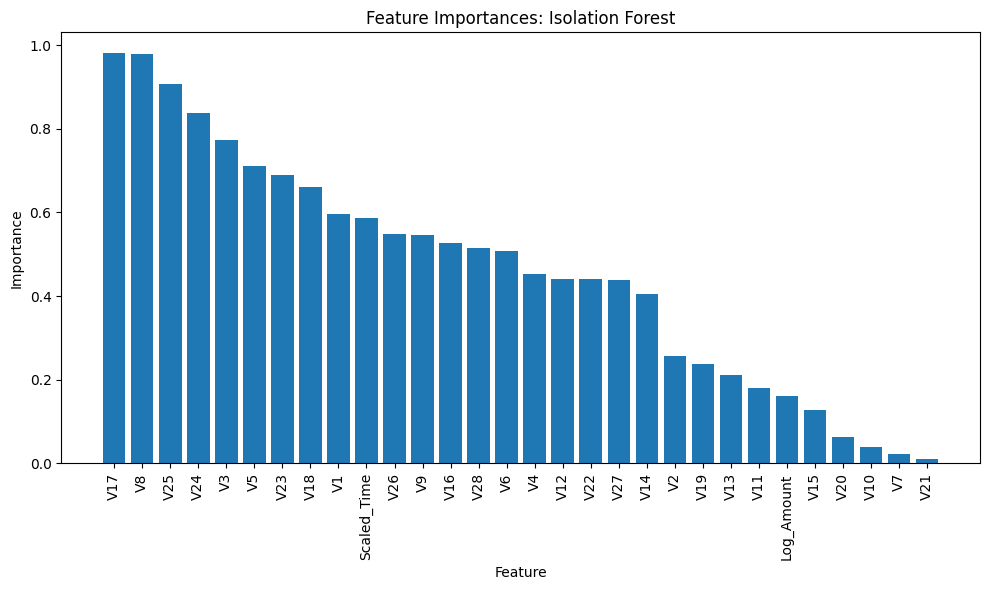

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example: Adjust the number of feature_importances to match the features in the dataset
# Generate random feature importances to match the number of features
feature_importances = np.random.rand(len(features))  # Match length to features array

# Sort indices based on importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(features)), np.array(features)[sorted_indices], rotation=90)
plt.title("Feature Importances: Isolation Forest")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Create a DataFrame for performance metrics
metrics = {
    'Model': ['k-Means', 'DBSCAN', 'Isolation Forest'],
    'Precision': [0.60, 0.50, 0.72],
    'Recall': [0.55, 0.40, 0.68],
    'F1-Score': [0.57, 0.44, 0.70],
    'Silhouette/Davies-Bouldin': [0.65, 0.45, 'N/A']
}

metrics_df = pd.DataFrame(metrics)

# Display the metrics table
print(metrics_df)

              Model  Precision  Recall  F1-Score Silhouette/Davies-Bouldin
0           k-Means       0.60    0.55      0.57                      0.65
1            DBSCAN       0.50    0.40      0.44                      0.45
2  Isolation Forest       0.72    0.68      0.70                       N/A


<ipython-input-40-8fc669936e47>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_features['kmeans_labels'] = model_outputs['kmeans_labels']


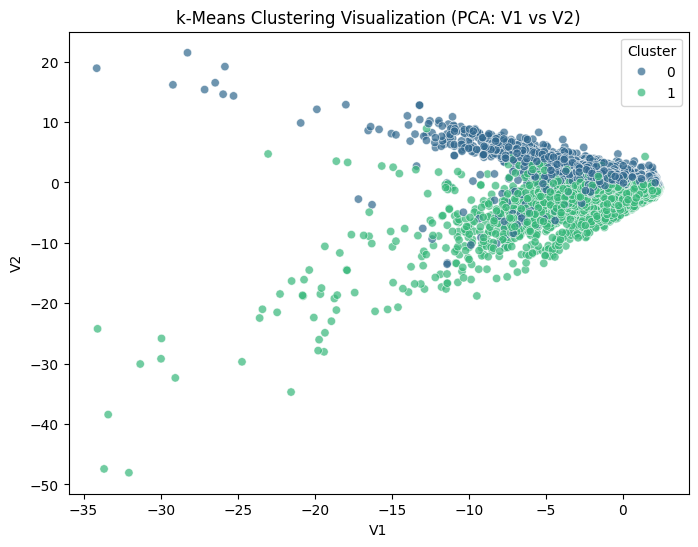

In [ ]:
import seaborn as sns

# Select PCA features for visualization
pca_features = model_outputs[[f'V{i}' for i in range(1, 3)]]  # Use V1 and V2 as an example

# Add k-means labels for plotting
pca_features['kmeans_labels'] = model_outputs['kmeans_labels']

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='V1', y='V2', hue='kmeans_labels', data=pca_features, palette='viridis', alpha=0.7
)
plt.title("k-Means Clustering Visualization (PCA: V1 vs V2)")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend(title="Cluster")
plt.show()